In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import shutil

# 경고 뜨지 않게...
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False
# 매직명령어 => 쥬피터노트북에서 그래프 삽입 기능 
%matplotlib inline
# 글꼴 선명화 
%config InlineBackend.figure_format = 'retina'

# 랜덤 모듈
import random

# 학습 모델 저장 및 복원
import pickle

# 딥러닝 라이브러리
import tensorflow as tf
# 신경망 모델을 관리하는 객체
from tensorflow.keras.models import Sequential
# 선형 회귀 레이어
from tensorflow.keras.layers import Dense
# 활성화 함수를 정의하는 객체
from tensorflow.keras.layers import Activation
# 원핫 인코딩을 수행하는 함수
from tensorflow.keras.utils import to_categorical

# 저장된 학습모델을 복원한다.
from tensorflow.keras.models import load_model

# 모델을 자동 저장한다.
from tensorflow.keras.callbacks import ModelCheckpoint
# 성능이 더이상 좋아지지 않을 경우 중단 시킨다.
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# 문자열 => 숫자
from sklearn.preprocessing import LabelEncoder

# 전체데이터를 학습용과 검증으로 나눈다.
from sklearn.model_selection import train_test_split

# 랜덤시드 설정
# 데이터를 랜덤하게 섞거나 가중치를 랜덤하게 설정하는 등..
# 작업에서 랜덤을 적용하는 경우가 더러 있다.
# 이에, 시드를 고정시킨다.
random_seed = 1
np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

# 현재 프로젝트에서 GPU 메모리 사용을 필요한 만큼만 쓸 수 있도록 한다.
# 컴퓨터에 있는 GPU 정보들을 가져온다.

gpus = tf.config.experimental.list_physical_devices('GPU')
# gpu가 있다면...
if len(gpus) > 0 :
    try :
        for gpu in gpus :
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e :
        print(e)

In [2]:
# MNIST
from tensorflow.keras.datasets import mnist

In [3]:
# mnist 데이터를 불러온다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# 이미지 전처리(이미지의 색상 데이터를 0~1 사이로 맞춘다.)
# 3차원 행렬을 2차원으로 변경한다.
# 2차원으로 되어 있는 이미지 행렬을 1차원으로 변경하는 작업
# 이미지의 개수
cnt = X_train.shape[0]
# 이미지의 높이 길이
h = X_train.shape[1]
# 이미지의 가로 길이
w = X_train.shape[2]

# 3차원 데이터를 2차원(이미지개수, 1차원으로 변환된 이미지데이터)로 변환한다.
X_train = X_train.reshape(cnt, h*w)
# 값을 0~1사이로 변환한다(표준화, 이미지 데이터는 0~255까지 있으므로 255로 나눠준다.)
X_train = X_train.astype('float64')
X_train = X_train / 255
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [5]:
# 이미지 전처리(이미지의 색상 데이터를 0~1 사이로 맞춘다.)
# 3차원 행렬을 2차원으로 변경한다.
# 2차원으로 되어 있는 이미지 행렬을 1차원으로 변경하는 작업
# 이미지의 개수
cnt = X_test.shape[0]
# 이미지의 높이 길이
h = X_test.shape[1]
# 이미지의 가로 길이
w = X_test.shape[2]

# 3차원 데이터를 2차원(이미지개수, 1차원으로 변환된 이미지데이터)로 변환한다.
X_test = X_test.reshape(cnt, h*w)
# 값을 0~1사이로 변환한다(표준화, 이미지 데이터는 0~255까지 있으므로 255로 나눠준다.)
X_test = X_test.astype('float64')
X_test = X_test / 255
X_test[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [6]:
# 결과 데이터 원핫 인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [8]:
# 2진 분류 옵션들
# out_nodes = 1
# loss_function = 'binary_crossentropy'
# activation_function = 'sigmoid'

# 다중 분류 옵션들
out_nodes = 10
loss_function = 'categorical_crossentropy'
activation_function = 'softmax'

# 회귀
# 출력 결과를 하나만 뽑아서 Series로 나왔다면...
# 1로 설정한다.
# if type(y) is pd.core.series.Series:
#     out_nodes = 1
# else : 
#     out_nodes = y.shape[1]
    
# loss_function = 'mean_squared_error'

In [9]:
# 입력노드의 개수
# 입력 데이터 행 하나의 컬럼의 개수
input_size = X_train.shape[1]
input_size

784

In [10]:
# 신경망 설계
model = Sequential()

model.add(Dense(60, input_dim=input_size))
model.add(Activation('relu'))

model.add(Dense(40))
model.add(Activation('relu'))

model.add(Dense(20))
model.add(Activation('relu'))

model.add(Dense(out_nodes))
model.add(Activation(activation_function))

In [11]:
# 모델 컴파일
model.compile(loss=loss_function, optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                47100     
                                                                 
 activation (Activation)     (None, 60)                0         
                                                                 
 dense_1 (Dense)             (None, 40)                2440      
                                                                 
 activation_1 (Activation)   (None, 40)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                820       
                                                                 
 activation_2 (Activation)   (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                2

In [12]:
# 학습모델을 저장할 경로
path = './model/27'

# 만약 폴더가 있다면 삭제한다.
if os.path.isdir(path):
    shutil.rmtree(path)

# 폴더를 생성한다.
os.makedirs(os.path.join(path))

In [13]:
path1 = path + '/{epoch}-{val_loss}.h5'
path2 = path + '/best_model.h5'

# 저장콜백
call1 = ModelCheckpoint(filepath=path1, monitor='val_loss', save_best_only=True)
call2 = ModelCheckpoint(filepath=path2, monitor='val_loss', save_best_onlu=True)

In [14]:
# 조기 중단
call3 = [EarlyStopping(monitor='val_loss', patience=50), TensorBoard(log_dir=path +'./logs', histogram_freq=1)]

In [15]:
# 학습
# validation_split : 주어진 데이터에서 사용할 검증데이터 비율
history = model.fit(X_train, y_train, epochs=200000, batch_size=10000,
                    validation_data=[X_test, y_test], callbacks=[call1, call2, call3])

Epoch 1/200000
6/6 [==============================] - 1s 68ms/step - loss: 2.2536 - accuracy: 0.1219 - val_loss: 2.1438 - val_accuracy: 0.1981
Epoch 2/200000
6/6 [==============================] - 0s 34ms/step - loss: 2.0609 - accuracy: 0.2610 - val_loss: 1.9301 - val_accuracy: 0.3285
Epoch 3/200000
6/6 [==============================] - 0s 34ms/step - loss: 1.8363 - accuracy: 0.3739 - val_loss: 1.6829 - val_accuracy: 0.4275
Epoch 4/200000
6/6 [==============================] - 0s 35ms/step - loss: 1.5802 - accuracy: 0.4902 - val_loss: 1.4235 - val_accuracy: 0.5622
Epoch 5/200000
6/6 [==============================] - 0s 37ms/step - loss: 1.3273 - accuracy: 0.6179 - val_loss: 1.1791 - val_accuracy: 0.6807
Epoch 6/200000
6/6 [==============================] - 0s 34ms/step - loss: 1.0973 - accuracy: 0.7068 - val_loss: 0.9686 - val_accuracy: 0.7322
Epoch 7/200000
6/6 [==============================] - 0s 36ms/step - loss: 0.9015 - accuracy: 0.7513 - val_loss: 0.7899 - val_accuracy: 0.7933

In [16]:
# 리스트를 추출한다.
loss_list = history.history['loss']
accuracy_list = history.history['accuracy']
val_loss_list = history.history['val_loss']
val_accuracy_list = history.history['val_accuracy']

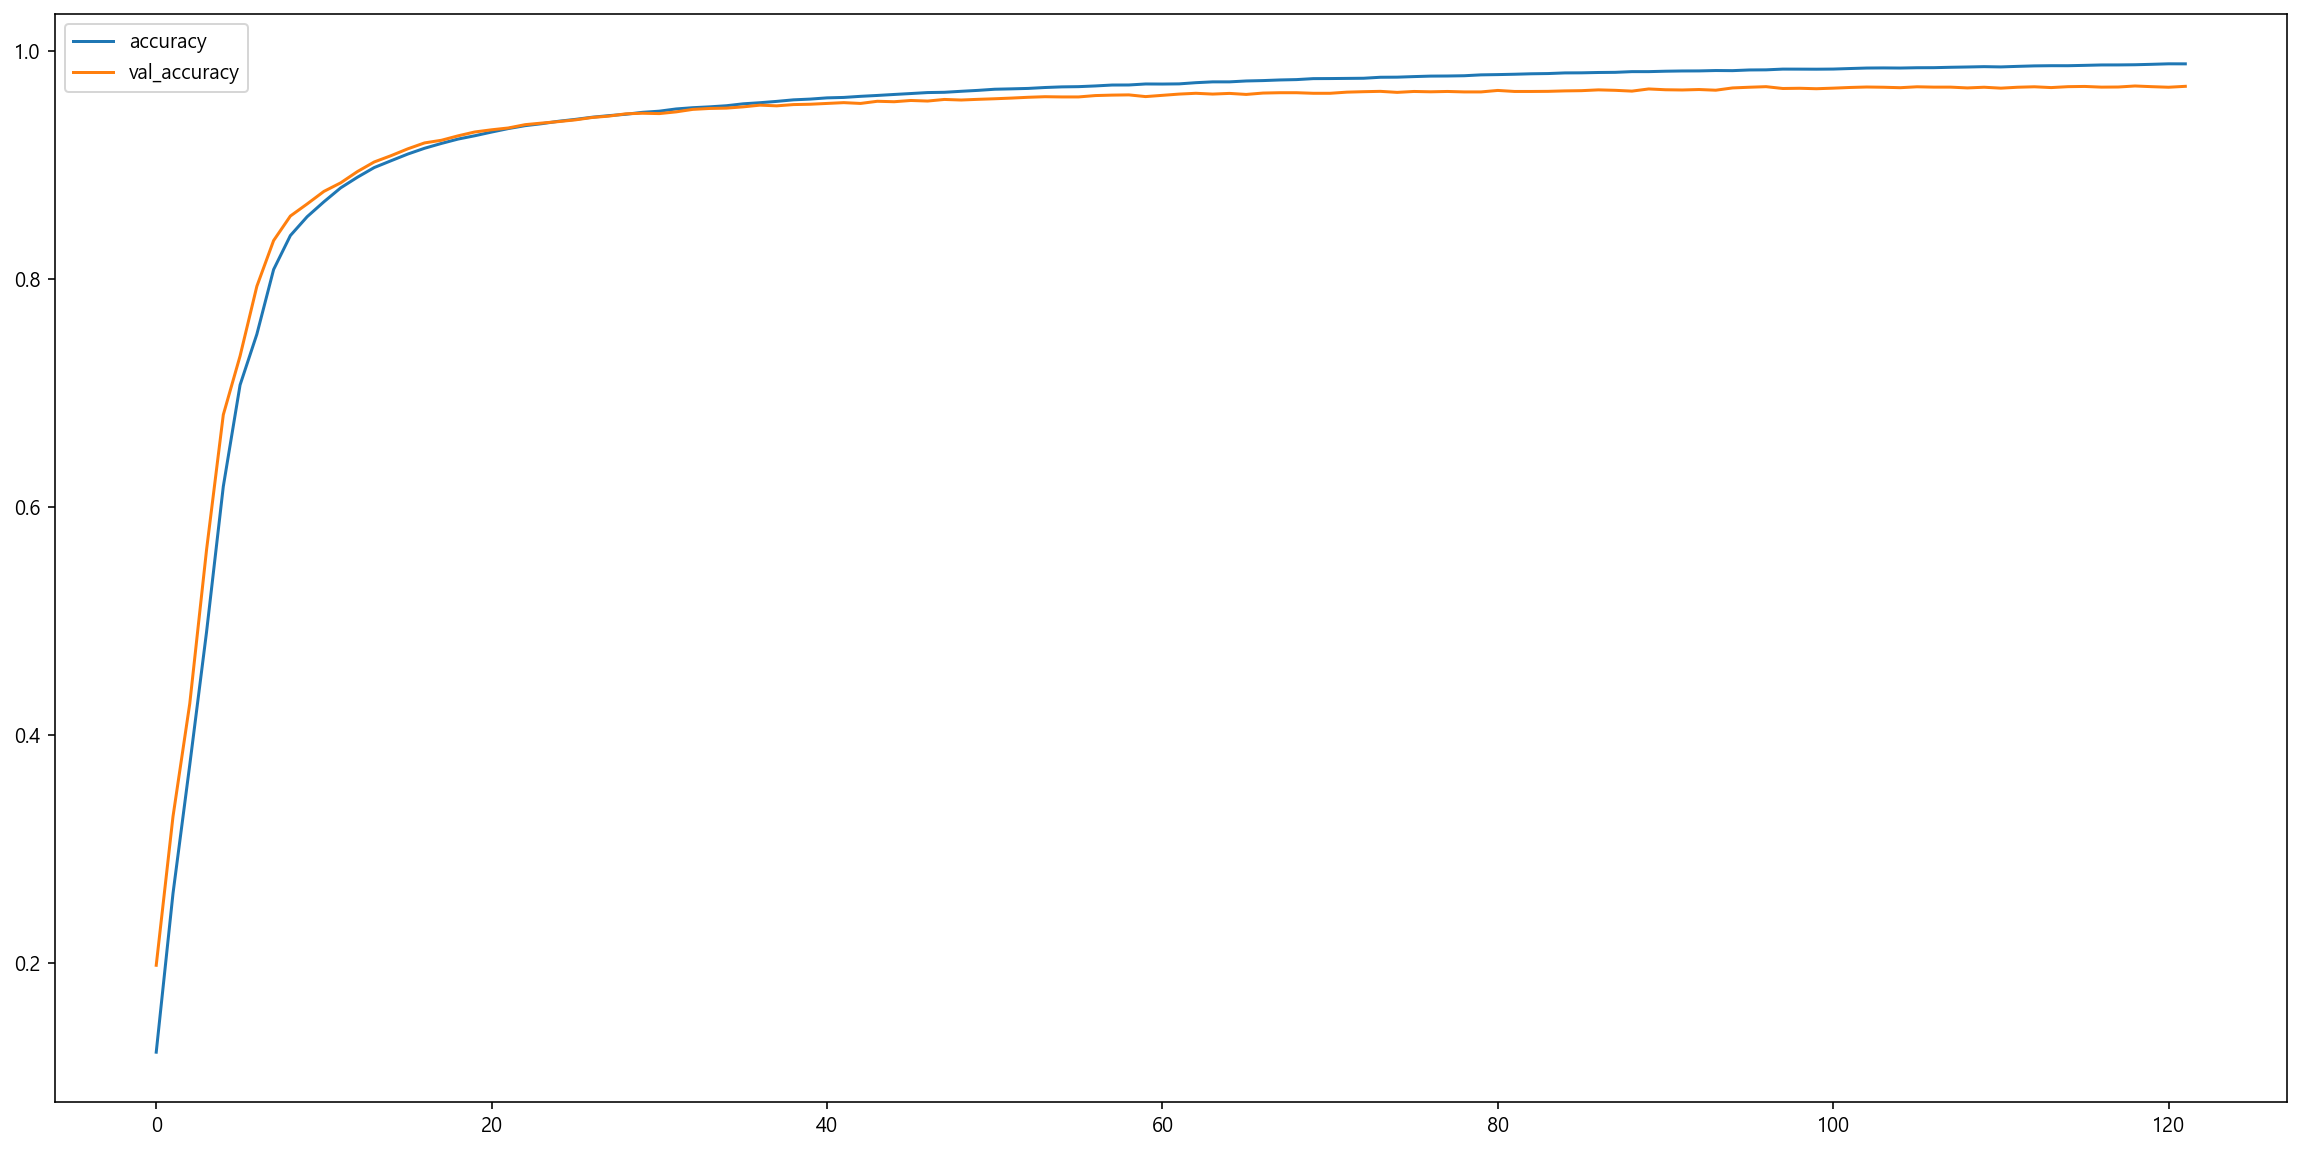

In [19]:
# 정확도 그래프
plt.figure(figsize=(20,10))
plt.plot(accuracy_list[:-50], label='accuracy')
plt.plot(val_accuracy_list[:-50], label = 'val_accuracy')
plt.legend()
plt.show()

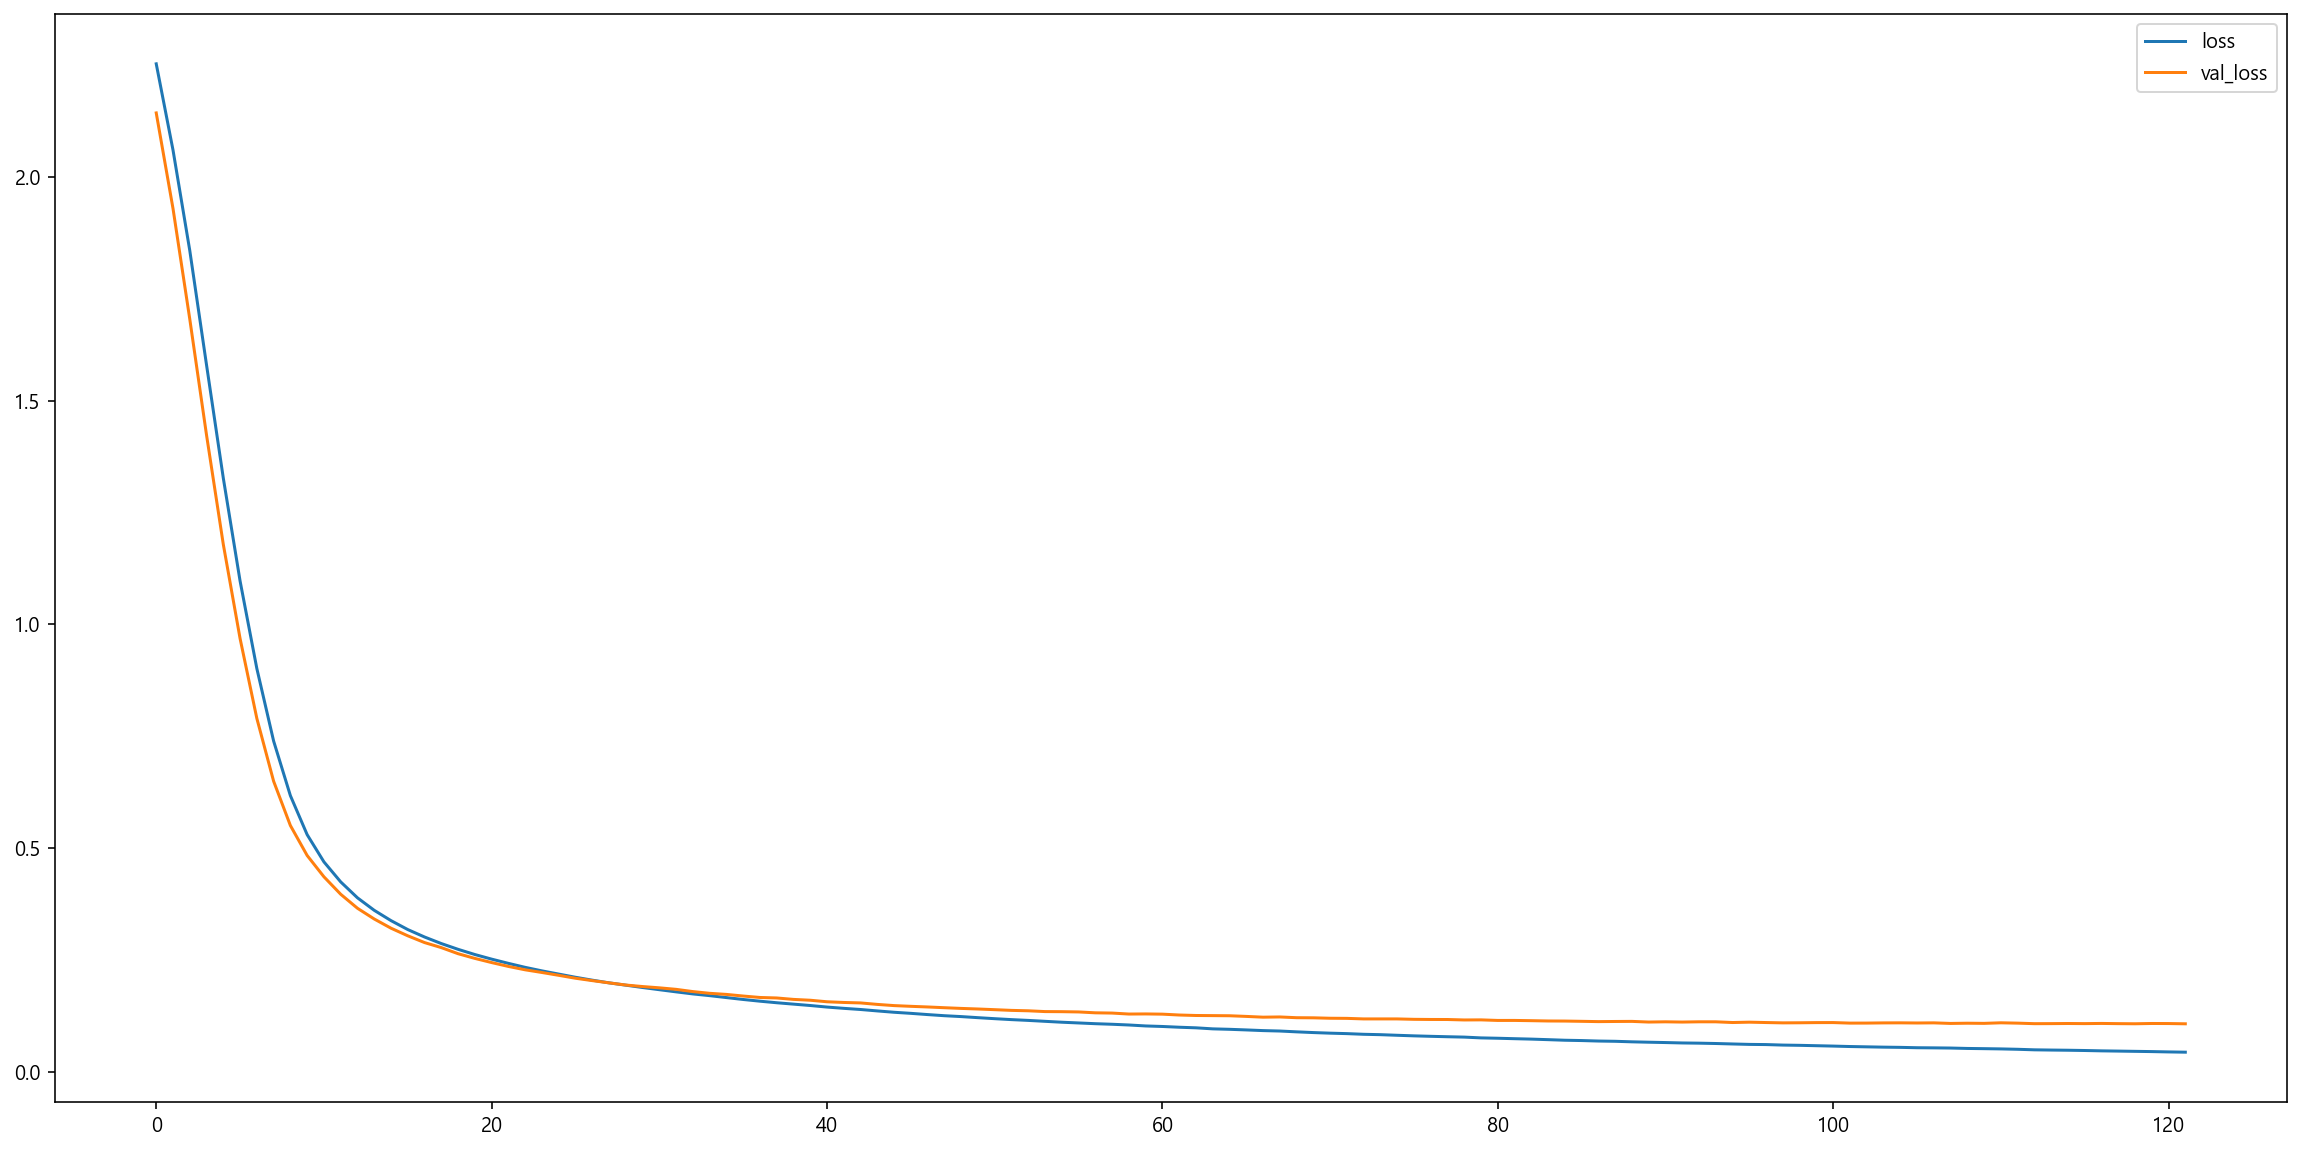

In [20]:
# 손실율 그래프
plt.figure(figsize=(20,10))
plt.plot(loss_list[:-50], label='loss')
plt.plot(val_loss_list[:-50], label = 'val_loss')
plt.legend()
plt.show()

In [21]:
%load_ext tensorboard

In [22]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 5580), started 1 day, 1:34:12 ago. (Use '!kill 5580' to kill it.)